# Importing Libraries

In [48]:
import math
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import plotly



import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()
import calendar

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats



from statsmodels.tsa.seasonal import seasonal_decompose
plotly.offline.init_notebook_mode (connected = True)

In [2]:
data_sheet1 = pd.read_excel("RetailPulseAssignmentData.xlsx",sheet_name='Year 2009-2010')
data_sheet2 = pd.read_excel("RetailPulseAssignmentData.xlsx",sheet_name='Year 2010-2011')

In [3]:
data_sheet1.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
data_sheet2.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [5]:
data_sheet1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [6]:
data_sheet2.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [7]:
data_sheet1.info

<bound method DataFrame.info of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0 

In [8]:
data_sheet2.info

<bound method DataFrame.info of        Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0 

In [9]:
# Merging both sheets to get a single dataframe
dataframe = pd.concat([data_sheet1, data_sheet2], ignore_index=True, sort=False)

In [10]:
dataframe.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [11]:
dataframe.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [12]:
dataframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Checking if the Sale is made on Weekend or Weekday

In [14]:
dataframe["DayOfMonth"] = (dataframe["InvoiceDate"]).dt.day
dataframe["IsWeekend"] = (dataframe['InvoiceDate'].dt.dayofweek >= 5).astype(int)
dataframe.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfMonth,IsWeekend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,0


In [15]:
#Cehcking the distribution of 'IsWeekend' column
dataframe.IsWeekend.value_counts()

0    927713
1    139658
Name: IsWeekend, dtype: int64

In [16]:
dataframe['BillValue'] = dataframe['Price'] * dataframe['Quantity']
dataframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,DayOfMonth,IsWeekend,BillValue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,0,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,0,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,0,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,0,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,0,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,0,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,9,0,14.85


In [17]:
#checking for negative values in 'Price'
(dataframe.Price <0).value_counts()

False    1067366
True           5
Name: Price, dtype: int64

In [18]:
#removing the '-' sign from values 
dataframe.Price = dataframe.Price.astype(str).str.replace('-', '').astype(float)
(dataframe.Price<0).value_counts()

False    1067371
Name: Price, dtype: int64

In [19]:
#checking for negative value in 'Quantity
(dataframe.Quantity <0).value_counts()

False    1044421
True       22950
Name: Quantity, dtype: int64

In [20]:
#changing the column values to absolute, removing any negative vlaues
dataframe.Quantity = dataframe.Quantity.abs()
(dataframe.Quantity <0).value_counts()

False    1067371
Name: Quantity, dtype: int64

In [21]:
dataframe[dataframe.duplicated('StockCode', keep=False)].groupby('StockCode')['Description'].apply(list).reset_index()

,StockCode,Description
0,10002,"[INFLATABLE POLITICAL GLOBE , INFLATABLE POLIT..."
1,10080,"[GROOVY CACTUS INFLATABLE, GROOVY CACTUS INFLA..."
2,10109,"[BENDY COLOUR PENCILS, nan]"
3,10120,"[DOGGY RUBBER, DOGGY RUBBER, DOGGY RUBBER, DOG..."
4,10125,"[MINI FUNKY DESIGN TAPES, MINI FUNKY DESIGN TA..."
...,...,...
4867,gift_0001_60,"[nan, nan]"
4868,gift_0001_70,"[nan, Dotcomgiftshop Gift Voucher £70.00, nan]"
4869,gift_0001_80,"[nan, Dotcomgiftshop Gift Voucher £80.00, Dotc..."
4870,gift_0001_90,"[nan, nan]"


# EDA

## Can customers be segmented into different categories? If yes then perform analysis on the same and also propose categories. If no, then explain why?

In [22]:
dataframe = dataframe.dropna()
dataframe.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
DayOfMonth     0
IsWeekend      0
BillValue      0
dtype: int64

In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   DayOfMonth   824364 non-null  int64         
 9   IsWeekend    824364 non-null  int64         
 10  BillValue    824364 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 75.5+ MB


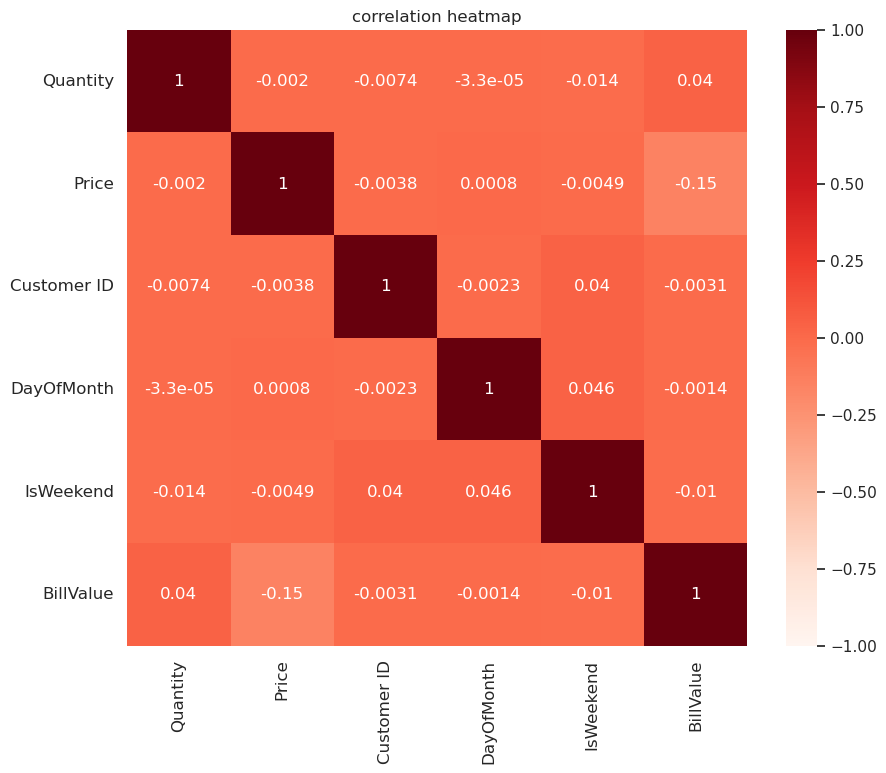

In [24]:
plt.figure(figsize=(10,8))
s = sns.heatmap(dataframe.corr(),
               annot=True,
               cmap='Reds',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('correlation heatmap')
plt.show()

In [25]:
frequency_customer= dataframe.groupby(["Customer ID"]).agg({"Invoice" : "nunique"}).reset_index()
frequency_customer.columns = ['Customer ID', 'Frequency']
frequency_customer=frequency_customer.sort_values(["Frequency"], ascending=False).reset_index()
frequency_customer= frequency_customer.drop(columns=['index'])
frequency_customer['freq_score']=0
frequency_customer['freq_score'] = pd.qcut(frequency_customer['Frequency'], 4, ['1','2','3','4']).astype(int)

frequency_customer

,Customer ID,Frequency,freq_score
0,14911.0,510,4
1,12748.0,365,4
2,17841.0,289,4
3,15311.0,270,4
4,14606.0,259,4
...,...,...,...
5937,17079.0,1,1
5938,17077.0,1,1
5939,13328.0,1,1
5940,15352.0,1,1


In [26]:
spending_customer = dataframe.groupby(["Customer ID"]).agg({"BillValue" : "sum"}).reset_index()
spending_customer.columns = ['Customer ID', 'monetary']
spending_customer = spending_customer.sort_values(["monetary"], ascending=False).reset_index()
spending_customer = spending_customer.drop(columns=['index'])
spending_customer['monetary_score']=0
spending_customer['monetary_score'] = pd.qcut(spending_customer['monetary'], 4, ['1','2','3','4']).astype(int)
spending_customer

,Customer ID,monetary,monetary_score
0,18102.0,598215.22,4
1,14646.0,523342.07,4
2,14156.0,296564.69,4
3,14911.0,270248.53,4
4,17450.0,233579.39,4
...,...,...,...
5937,16981.0,-4620.86,1
5938,15760.0,-5795.87,1
5939,15849.0,-5876.34,1
5940,12918.0,-10953.50,1


In [27]:
customer_recency= dataframe.groupby(["Customer ID"]).agg({"InvoiceDate" : "max"}).reset_index()
customer_recency.columns = ['Customer ID', 'Recency']
customer_recency=customer_recency.sort_values(["Recency"], ascending=False).reset_index()
refrence_date = customer_recency.Recency.max() + dt.timedelta(days = 1)
customer_recency['Recency'] = (refrence_date - customer_recency.Recency).astype('timedelta64[D]')
customer_recency = customer_recency.drop(columns=['index'])
customer_recency['recency_score']=0
customer_recency['recency_score'] = pd.qcut(customer_recency['Recency'], 4, ['1','2','3','4']).astype(int)
        
customer_recency

,Customer ID,Recency,recency_score
0,12680.0,1.0,1
1,13113.0,1.0,1
2,15804.0,1.0,1
3,13777.0,1.0,1
4,17581.0,1.0,1
...,...,...,...
5937,14654.0,738.0,4
5938,17056.0,738.0,4
5939,17641.0,739.0,4
5940,17592.0,739.0,4


In [28]:
customers = pd.merge(frequency_customer, spending_customer, on="Customer ID")
customers = pd.merge(customers, customer_recency, on="Customer ID")
customers

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score
0,14911.0,510,4,270248.53,4,1.0,1
1,12748.0,365,4,49970.13,4,1.0,1
2,17841.0,289,4,69516.19,4,2.0,1
3,15311.0,270,4,113513.07,4,1.0,1
4,14606.0,259,4,30094.38,4,1.0,1
...,...,...,...,...,...,...,...
5937,17079.0,1,1,118.80,1,78.0,2
5938,17077.0,1,1,306.00,1,578.0,4
5939,13328.0,1,1,1308.48,3,316.0,3
5940,15352.0,1,1,114.95,1,549.0,4


/tmp/ipykernel_67535/3086396657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers['Frequency'])


<AxesSubplot: xlabel='Frequency', ylabel='Density'>

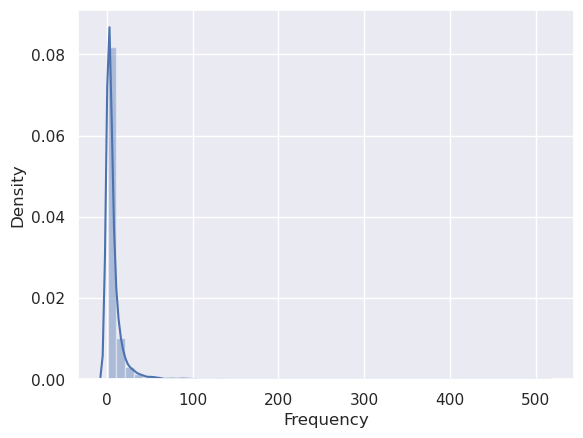

In [29]:
sns.distplot(customers['Frequency'])
#sns.distplot((customers['monetary']))
#sns.distplot((customers['Recency']))

In [30]:
customers.describe()

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score
count,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,7.552339,2.263548,2801.799459,2.500000,202.908617,2.492427
std,1715.451981,15.972262,1.204916,13973.922553,1.118279,211.857936,1.122909
min,12346.000000,1.000000,1.000000,-25111.090000,1.000000,1.000000,1.000000
25%,13831.250000,2.000000,1.000000,325.097500,1.250000,25.000000,1.000000
50%,15316.500000,4.000000,2.000000,843.970000,2.500000,96.000000,2.000000
75%,16801.750000,8.000000,3.000000,2182.005000,3.750000,381.000000,3.000000
max,18287.000000,510.000000,4.000000,598215.220000,4.000000,739.000000,4.000000


In [31]:
customers['RFM'] = (customers.recency_score.astype(str)+ customers.freq_score.astype(str) + customers.monetary_score.astype(str)).astype(int)
customers = customers.sort_values(["RFM"], ascending=False).reset_index()
customers = customers.drop(columns=['index'])
customers

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM
0,12835.0,49,4,6018.67,4,418.0,4,444
1,17465.0,9,4,2533.64,4,426.0,4,444
2,15633.0,18,4,4173.41,4,509.0,4,444
3,15538.0,11,4,3027.15,4,538.0,4,444
4,14685.0,13,4,4324.31,4,576.0,4,444
...,...,...,...,...,...,...,...,...
5937,14601.0,1,1,213.96,1,11.0,1,111
5938,12702.0,1,1,219.00,1,20.0,1,111
5939,13986.0,1,1,320.46,1,17.0,1,111
5940,15318.0,1,1,312.62,1,4.0,1,111


In [32]:
customers['monetary'].replace(0,0.001,inplace=True)

In [33]:
(customers.monetary <0).value_counts()

False    5857
True       85
Name: monetary, dtype: int64

In [34]:
customers.monetary = customers.monetary.astype(str).str.replace('-', '').astype(float)

In [35]:
# data is skewed so log transform and standard scaler helps to normalize it. 
customers['recency_log'] = customers['Recency'].apply(math.log)
customers['frequency_log'] =customers['Frequency'].apply(math.log)
customers['monetary_log'] =customers['monetary'].apply(math.log)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers[['monetary_log', 'recency_log','frequency_log']])

/tmp/ipykernel_67535/3241652451.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((customers['monetary_log']))


<AxesSubplot: xlabel='monetary_log', ylabel='Density'>

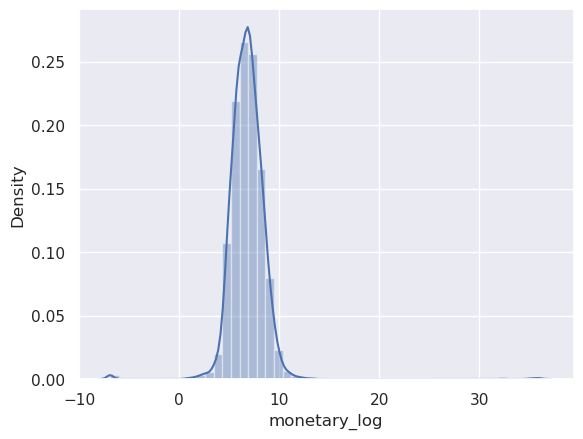

In [36]:
sns.distplot((customers['monetary_log']))
#sns.distplot((customers['frequency_log']))
#sns.distplot((customers['recency_log']))

In [37]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10, max_iter=500,random_state=75)
kmeans.fit(scaled_features)
customers['cluster'] = kmeans.labels_
cluster_centers=kmeans.cluster_centers_

In [38]:
customers.head(10)

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM,recency_log,frequency_log,monetary_log,cluster
0,12835.0,49,4,6018.670,4,418.0,4,444,6.035481,3.891820,8.702622,0
1,17465.0,9,4,2533.640,4,426.0,4,444,6.054439,2.197225,7.837412,0
2,15633.0,18,4,4173.410,4,509.0,4,444,6.232448,2.890372,8.336489,0
3,15538.0,11,4,3027.150,4,538.0,4,444,6.287859,2.397895,8.015377,0
4,14685.0,13,4,4324.310,4,576.0,4,444,6.356108,2.564949,8.372008,0
5,14590.0,28,4,2884.290,4,425.0,4,444,6.052089,3.332205,7.967034,0
6,15015.0,20,4,2275.820,4,501.0,4,444,6.216606,2.995732,7.730096,0
7,14025.0,10,4,3969.100,4,465.0,4,444,6.142037,2.302585,8.286295,0
8,14249.0,12,4,5625.461,4,411.0,4,444,6.018593,2.484907,8.635058,0
9,14134.0,15,4,11123.350,4,383.0,4,444,5.948035,2.708050,9.316802,0


In [39]:
features = ['monetary',  'Recency',  'Frequency']
scaler.inverse_transform(kmeans.cluster_centers_)
data_inversed = scaler.inverse_transform(cluster_centers)
data_transformed=pd.DataFrame(np.exp(data_inversed),columns=features)
data_transformed.reset_index(inplace=True)
data_transformed.rename(columns={"index": "Cluster"},inplace=True)

(0.0, 70.0)

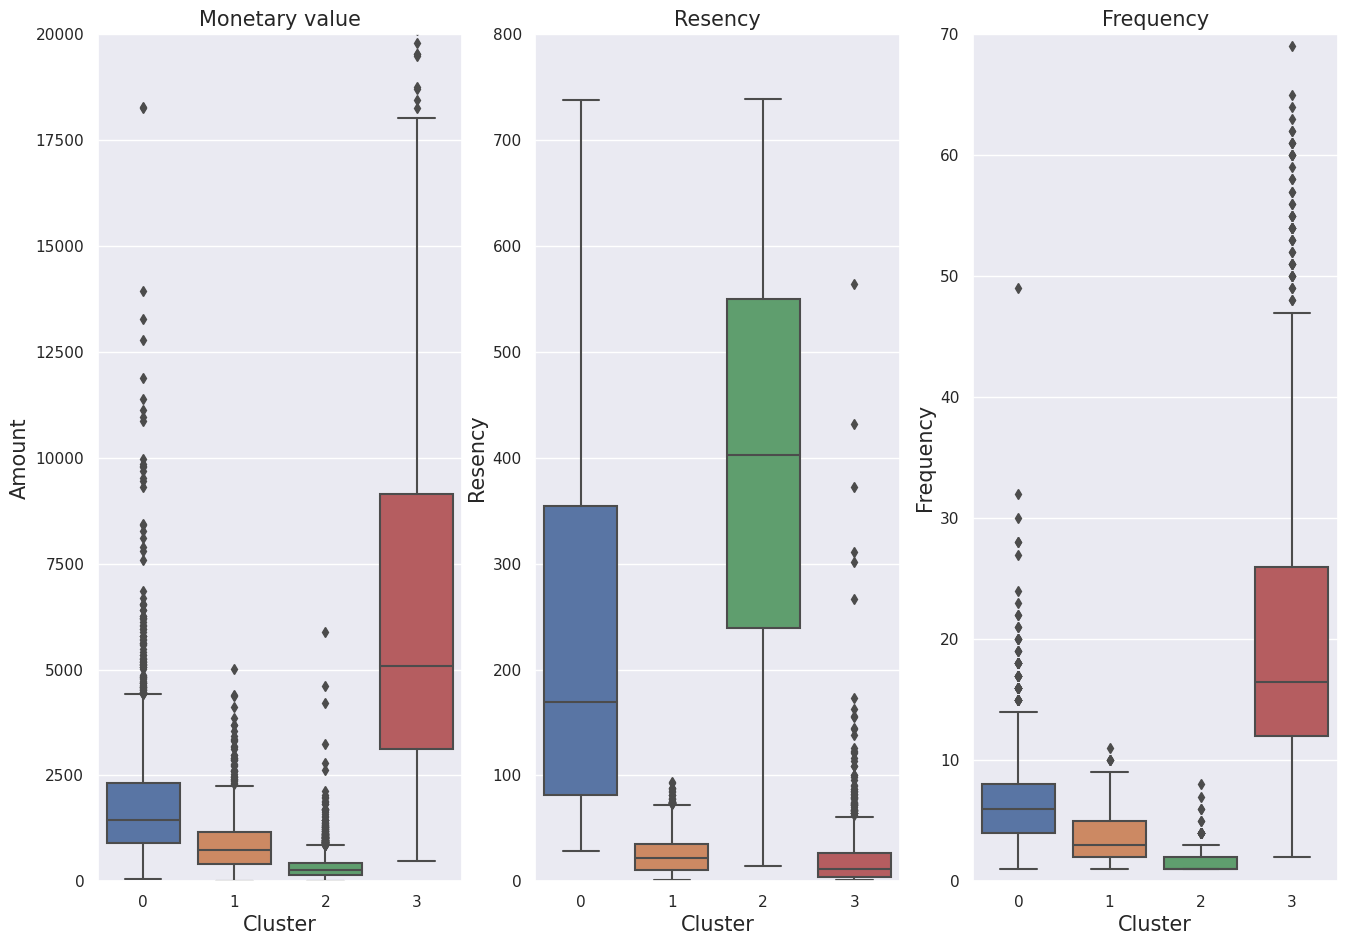

In [40]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,11))
f1 = fig.add_subplot(131)
sns.set(font_scale =1)
ax1=sns.boxplot(x=customers['cluster'],y=customers['monetary'])
ax1.set_title('Monetary value', fontsize = 15)
ax1.set_ylabel('Amount', fontsize =15)
ax1.set_xlabel ('Cluster', fontsize = 15)
ax1.set_ylim(top=20000,bottom=0)

f1 = fig.add_subplot(132)
sns.set(font_scale = 1)
ax2=sns.boxplot(x=customers['cluster'],y=customers[ 'Recency'])
ax2.set_title('Resency', fontsize =15)
ax2.set_ylabel('Resency', fontsize =15)
ax2.set_xlabel ('Cluster', fontsize = 15)
ax2.set_ylim(top=800,bottom=0)

f1 = fig.add_subplot(133)
sns.set(font_scale = 1)
ax3=sns.boxplot(x=customers['cluster'],y=customers[ 'Frequency'])
ax3.set_title('Frequency', fontsize = 15)
ax3.set_ylabel('Frequency', fontsize =15)
ax3.set_xlabel ('Cluster', fontsize = 15)
ax3.set_ylim(top=70,bottom=0)

**Cluster 0:** are low spenders, low number of orders, and recent purchase was long ago.<br>
**Cluster 1:** are the frequent purchasers. This group buys often, bought recently and spends more.<br>
**Cluster 2:** are probably new customers. Recent purchases but didn’t spend much.<br>
**Cluster 3:** are loyal customers who make big and frequent purchases, and the last purchase was also recently.

## How would you define a loyal customer?

In [41]:
len(customers.RFM.unique())

63

In [42]:
rfm_customer = customers
rfm_customer['rfm_cluster']=0
rfm_customer['rfm_cluster'] = pd.qcut(customer_recency['Recency'], 4, ['0','1','2','3']).astype(int)
rfm_customer

,Customer ID,Frequency,freq_score,monetary,monetary_score,Recency,recency_score,RFM,recency_log,frequency_log,monetary_log,cluster,rfm_cluster
0,12835.0,49,4,6018.67,4,418.0,4,444,6.035481,3.891820,8.702622,0,0
1,17465.0,9,4,2533.64,4,426.0,4,444,6.054439,2.197225,7.837412,0,0
2,15633.0,18,4,4173.41,4,509.0,4,444,6.232448,2.890372,8.336489,0,0
3,15538.0,11,4,3027.15,4,538.0,4,444,6.287859,2.397895,8.015377,0,0
4,14685.0,13,4,4324.31,4,576.0,4,444,6.356108,2.564949,8.372008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,14601.0,1,1,213.96,1,11.0,1,111,2.397895,0.000000,5.365789,1,3
5938,12702.0,1,1,219.00,1,20.0,1,111,2.995732,0.000000,5.389072,1,3
5939,13986.0,1,1,320.46,1,17.0,1,111,2.833213,0.000000,5.769757,1,3
5940,15318.0,1,1,312.62,1,4.0,1,111,1.386294,0.000000,5.744988,1,3


(0.0, 70.0)

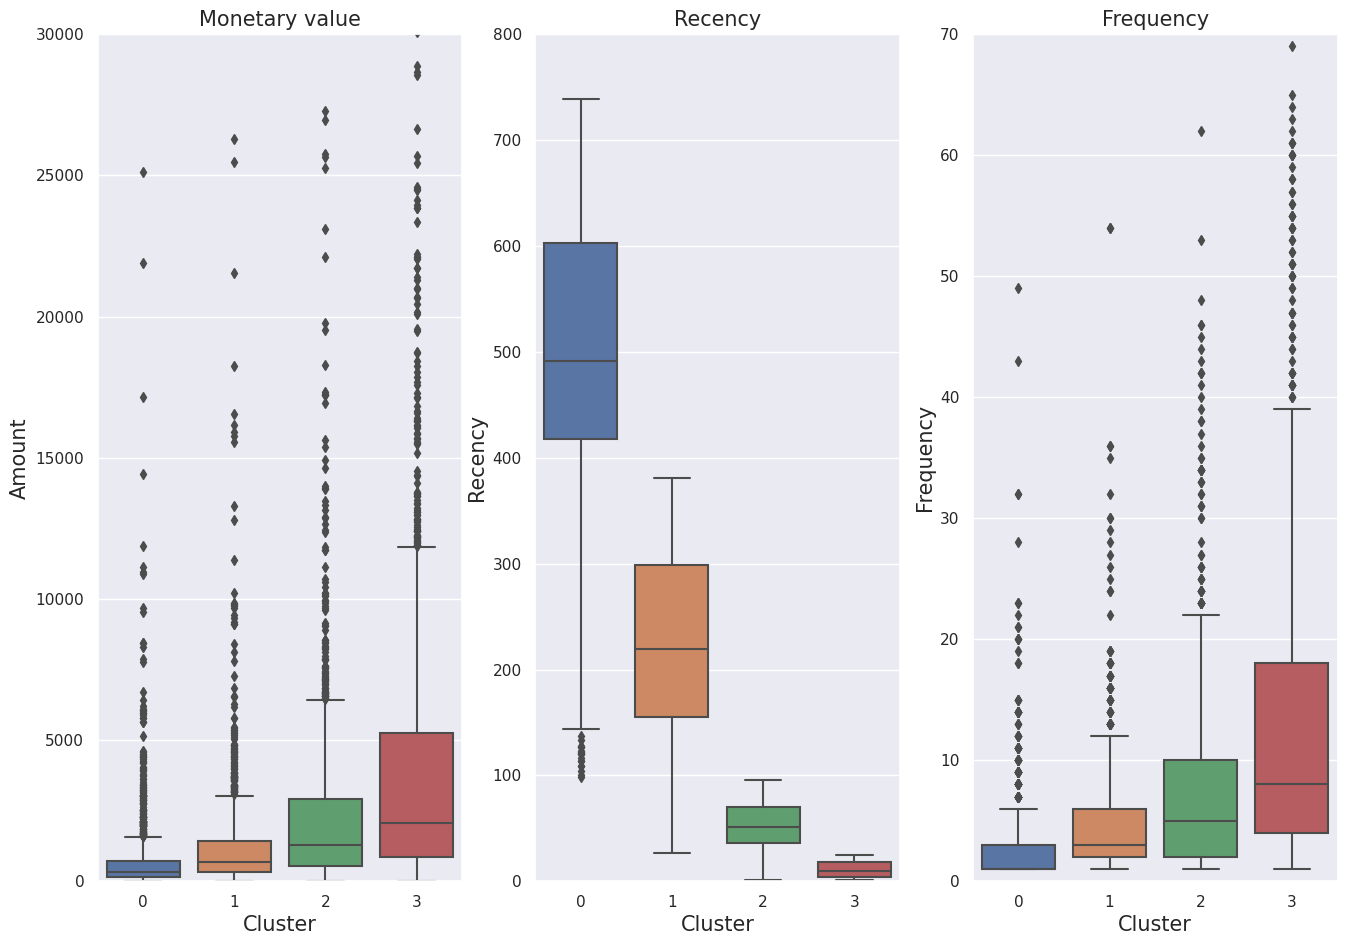

In [43]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,11))
f1 = fig.add_subplot(131)
sns.set(font_scale =1)
ax1=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer['monetary'])
ax1.set_title('Monetary value', fontsize = 15)
ax1.set_ylabel('Amount', fontsize =15)
ax1.set_xlabel ('Cluster', fontsize = 15)
ax1.set_ylim(top=30000,bottom=0)

f1 = fig.add_subplot(132)
sns.set(font_scale = 1)
ax2=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer[ 'Recency'])
ax2.set_title('Recency', fontsize =15)
ax2.set_ylabel('Recency', fontsize =15)
ax2.set_xlabel ('Cluster', fontsize = 15)
ax2.set_ylim(top=800,bottom=0)

f1 = fig.add_subplot(133)
sns.set(font_scale = 1)
ax3=sns.boxplot(x=rfm_customer['rfm_cluster'],y=rfm_customer[ 'Frequency'])
ax3.set_title('Frequency', fontsize = 15)
ax3.set_ylabel('Frequency', fontsize =15)
ax3.set_xlabel ('Cluster', fontsize = 15)
ax3.set_ylim(top=70,bottom=0)

**Cluster 0:** Lost Customers, rarely made a purchase that too of low amount.<br>
**Cluster 1:** Wandering Customers, this groups shops around and spends less.<br>
**Cluster 2:** Promising Customers, they also stick with their retailer but don’t spend big amounts.<br>
**Cluster 3:** This cluster tends to visit frequently and spends more than any other cluster, their last purchase was also not long ago. We can say these are the loyal customers. This group tends to stick with their retailer.<br>

## What is the most popular time of year based on this sales data?

/tmp/ipykernel_67535/3324638800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Year"] = (df_year.InvoiceDate).dt.year
/tmp/ipykernel_67535/3324638800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Month"] = (df_year.InvoiceDate).dt.month


<AxesSubplot: xlabel='Year'>

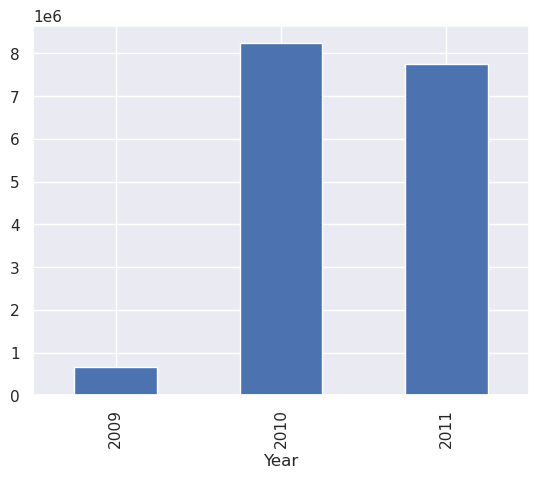

In [44]:
df_year = dataframe
df_year["Year"] = (df_year.InvoiceDate).dt.year
df_year["Month"] = (df_year.InvoiceDate).dt.month

df_year.groupby('Year')['BillValue'].sum().plot(kind = 'bar')

<AxesSubplot: title={'center': 'Sales month wise'}, xlabel='Year,Month'>

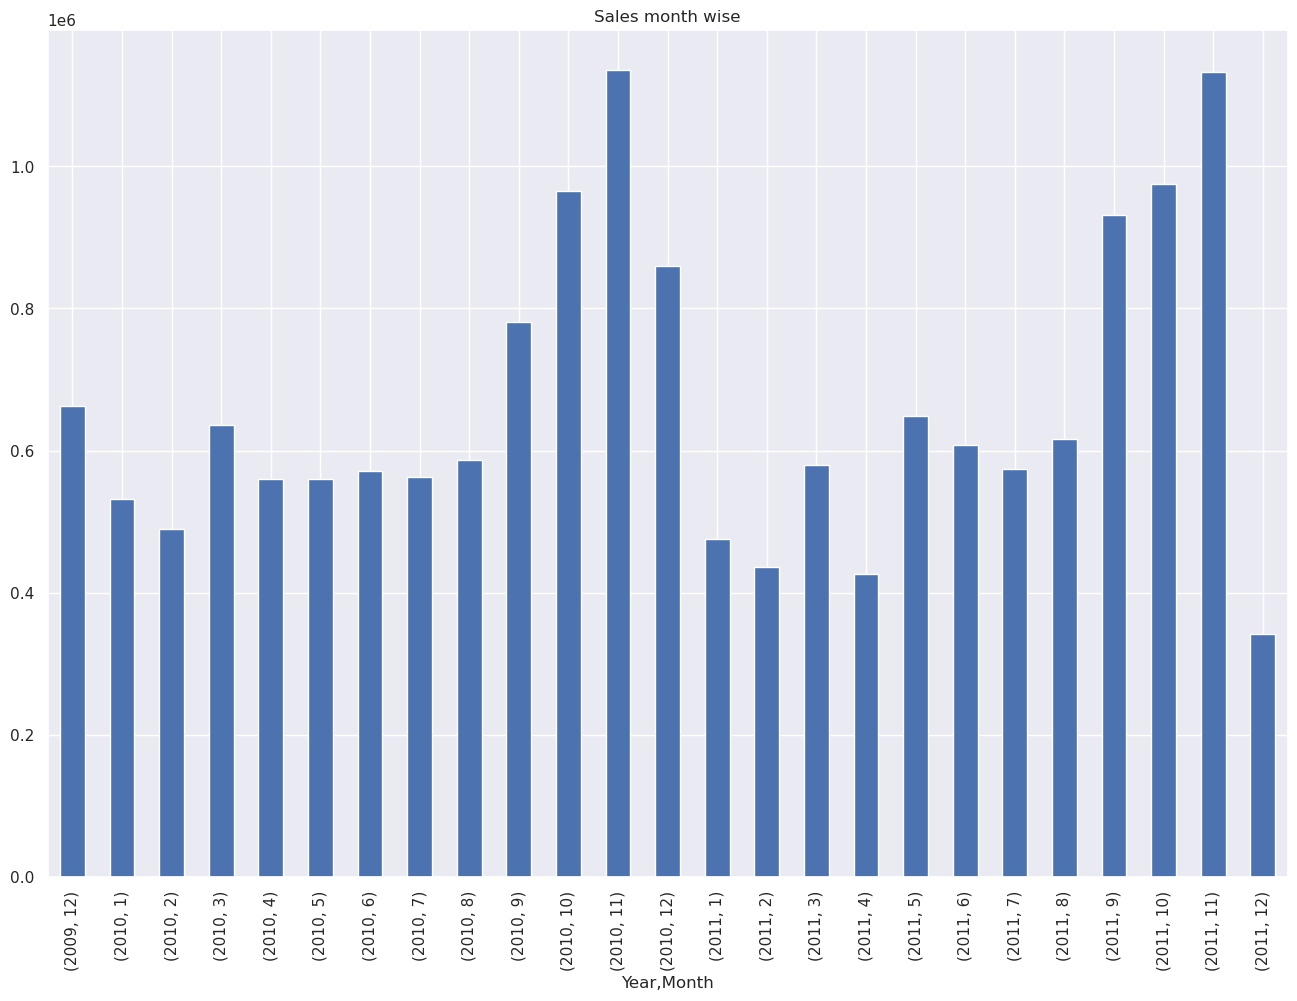

In [45]:
df_year.groupby(['Year','Month'])['BillValue'].sum().plot(kind = 'bar', title = 'Sales month wise',figsize=(16,11))

In [46]:
last_order_date = df_year['InvoiceDate'].max()
last_order_date

Timestamp('2011-12-09 12:50:00')

According to the stastics in above bar plot we can se September, October and November is usually the most popular time. We have high sales in 2009 december and 2010 december as well but that trend did not continue to 2011. This is beacuse we only have data till 9 December 2011.

## Is there any seasonality in data? Explain with supportive evidence.

<AxesSubplot: title={'center': 'Sales month wise'}, xlabel='Year,Month'>

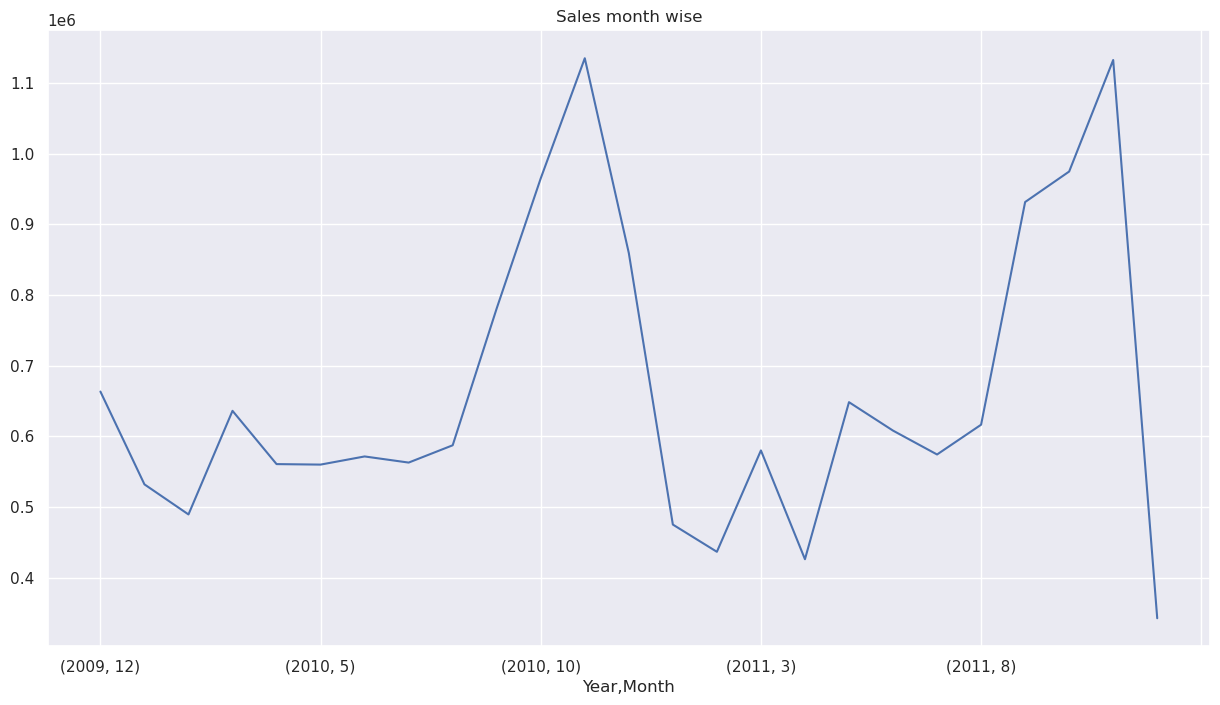

In [51]:
df_year.groupby(['Year','Month'])['BillValue'].sum().plot(kind = 'line', title = 'Sales month wise',figsize=(15,8))

Yes, there is a seasonality in data.
As the data is not in 2 complete cycles. I cannot perform decomposition into seasonal, trend and residual component of time series analysis. But after looking at the above line graph of Sale value wrt time we can easily see a jump in sales around september in both year (2010 and 2011).

## Discuss customer's lifetime with respect to the given dataset.

In [52]:
data_life = dataframe

In [53]:
data_life.InvoiceDate = pd.to_datetime(data_life.InvoiceDate).dt.date
data_life = data_life[pd.notnull(data_life['Customer ID'])]
data_life = data_life[(data_life.Quantity >0)]
data_life['Total_Sales'] = data_life.Quantity * data_life.Price
columns = ['Customer ID', 'InvoiceDate', 'Total_Sales']
data_life = data_life[columns]
data_life.head()

/tmp/ipykernel_67535/3131993596.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,InvoiceDate,Total_Sales
0,13085.0,2009-12-01,83.4
1,13085.0,2009-12-01,81.0
2,13085.0,2009-12-01,81.0
3,13085.0,2009-12-01,100.8
4,13085.0,2009-12-01,30.0


In [56]:
from lifetimes.plotting import *
from lifetimes.utils import *

data_life = summary_data_from_transaction_data(data_life,customer_id_col= 'Customer ID',datetime_col= 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')
data_life.reset_index()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,15508.760000
1,12347.0,7.0,402.0,404.0,717.398571
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,4.0,717.0,735.0,1107.172500
4,12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...,...
5937,18283.0,18.0,655.0,658.0,146.405556
5938,18284.0,1.0,2.0,431.0,25.000000
5939,18285.0,0.0,0.0,660.0,0.000000
5940,18286.0,2.0,247.0,723.0,470.740000


Percentage of one time buyers: 25.98451699764389


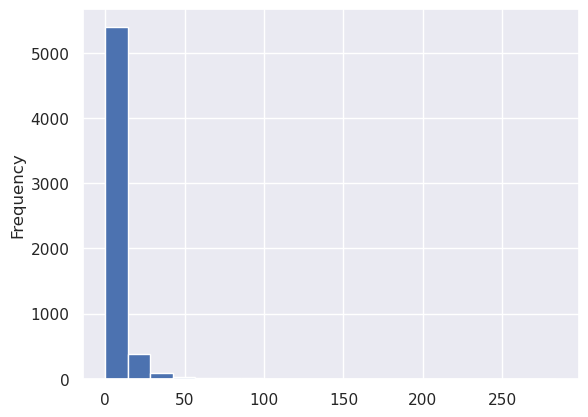

In [57]:
data_life.frequency.plot(kind='hist', bins=20)

one_time_buyers = sum(data_life.frequency == 0)/float(len(data_life))*100
print("Percentage of one time buyers:", one_time_buyers)

In [58]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data_life.frequency, data_life.recency, data_life['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


/home/abhishek/anaconda3/envs/mtp/lib/python3.10/site-packages/lifetimes/fitters/beta_geo_fitter.py:256: RuntimeWarning:

overflow encountered in double_scalars



<AxesSubplot: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

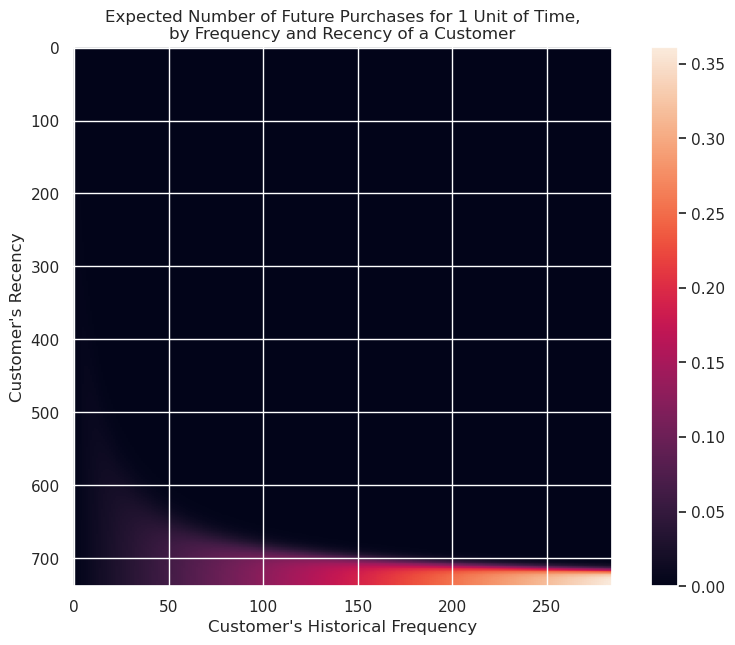

In [59]:
fig = plt.figure(figsize=(10,7))
plot_frequency_recency_matrix(bgf)

<AxesSubplot: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

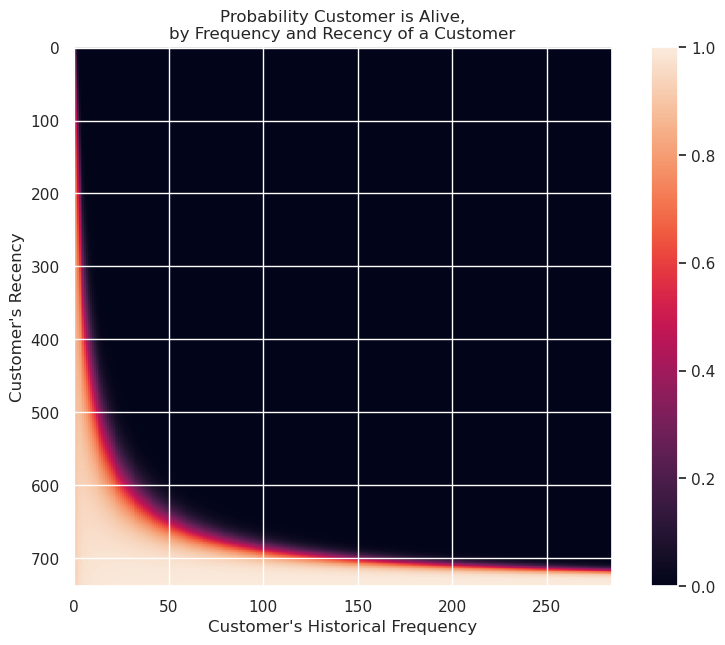

In [60]:
fig = plt.figure(figsize=(10,7))
plot_probability_alive_matrix(bgf)

In [61]:
data_life['pred_num_txn'] = bgf.conditional_expected_number_of_purchases_up_to_time(15, data_life.frequency, data_life.recency, data_life['T'])
data_life.sort_values(by='pred_num_txn', ascending=False).reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,284.0,737.0,738.0,1130.151761,5.407802e+00
1,12748.0,206.0,735.0,735.0,305.862864,3.941154e+00
2,15311.0,201.0,738.0,738.0,593.065821,3.831115e+00
3,17841.0,193.0,736.0,737.0,371.612383,3.682928e+00
4,14606.0,181.0,735.0,736.0,173.551050,3.458953e+00
...,...,...,...,...,...,...
5937,16754.0,20.0,269.0,641.0,3802.518000,7.482860e-06
5938,13446.0,17.0,243.0,663.0,212.572353,6.918304e-06
5939,15633.0,16.0,222.0,731.0,271.226250,8.686909e-07
5940,13093.0,70.0,468.0,735.0,783.144286,1.146590e-10


<AxesSubplot: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

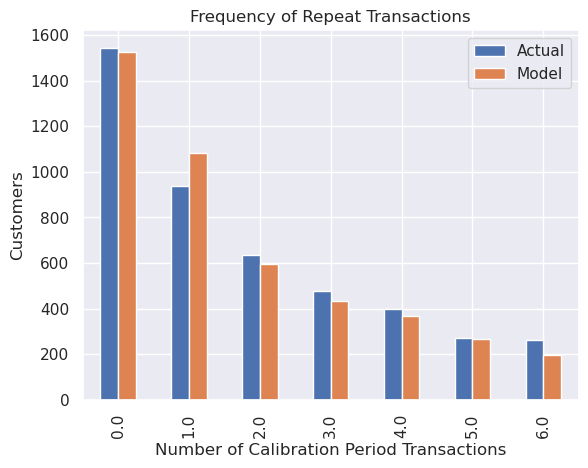

In [62]:
plot_period_transactions(bgf)

In [66]:
data_life.corr()

,frequency,recency,T,monetary_value,pred_num_txn
frequency,1.000000,0.512776,0.306513,0.042126,0.896028
recency,0.512776,1.000000,0.625232,0.064859,0.384171
T,0.306513,0.625232,1.000000,0.029148,0.013955
monetary_value,0.042126,0.064859,0.029148,1.000000,0.037136
pred_num_txn,0.896028,0.384171,0.013955,0.037136,1.000000


In [67]:
shortlisted_customers = data_life[data_life.frequency >0]
shortlisted_customers.reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn
0,12346.0,10.0,400.0,725.0,15508.760000,0.038732
1,12347.0,7.0,402.0,404.0,717.398571,0.248217
2,12348.0,4.0,363.0,438.0,449.310000,0.134854
3,12349.0,4.0,717.0,735.0,1107.172500,0.086357
4,12352.0,8.0,356.0,392.0,458.340000,0.284057
...,...,...,...,...,...,...
4393,18282.0,2.0,119.0,126.0,39.645000,0.215088
4394,18283.0,18.0,655.0,658.0,146.405556,0.391728
4395,18284.0,1.0,2.0,431.0,25.000000,0.013591
4396,18286.0,2.0,247.0,723.0,470.740000,0.032320


In [64]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers.frequency, shortlisted_customers.monetary_value)
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4398 subjects, p: 1.17, q: 3.86, v: 865.47>


In [65]:
ggf.conditional_expected_average_profit(data_life.frequency,data_life.monetary_value)

Customer ID
12346.0    12543.471490
12347.0      624.112486
12348.0      413.913342
12349.0      822.967778
12350.0      355.719248
               ...     
18283.0      171.329036
18284.0      259.384093
18285.0      355.719248
18286.0      407.612130
18287.0      598.654483
Length: 5942, dtype: float64

In [68]:
data_life['txn_value'] = ggf.conditional_expected_average_profit(data_life.frequency, data_life.monetary_value)
data_life.reset_index()

,Customer ID,frequency,recency,T,monetary_value,pred_num_txn,txn_value
0,12346.0,10.0,400.0,725.0,15508.760000,0.038732,12543.471490
1,12347.0,7.0,402.0,404.0,717.398571,0.248217,624.112486
2,12348.0,4.0,363.0,438.0,449.310000,0.134854,413.913342
3,12349.0,4.0,717.0,735.0,1107.172500,0.086357,822.967778
4,12350.0,0.0,0.0,310.0,0.000000,0.027783,355.719248
...,...,...,...,...,...,...,...
5937,18283.0,18.0,655.0,658.0,146.405556,0.391728,171.329036
5938,18284.0,1.0,2.0,431.0,25.000000,0.013591,259.384093
5939,18285.0,0.0,0.0,660.0,0.000000,0.014101,355.719248
5940,18286.0,2.0,247.0,723.0,470.740000,0.032320,407.612130


In [69]:
data_life['Cust_life_value'] = round(ggf.customer_lifetime_value(bgf, data_life.frequency, data_life.recency, 
                                                      data_life['T'], data_life.monetary_value, time=12,
                                                     discount_rate=0.01), 2)

data_life.drop(data_life.iloc[:, 0:6], inplace=True, axis=1)

data_life.sort_values(by='Cust_life_value', ascending=False).head(10).reset_index()

,Customer ID,Cust_life_value
0,18102.0,250675.52
1,14646.0,216326.84
2,17450.0,139493.90
3,14156.0,135577.17
4,14096.0,133606.19
5,14911.0,133129.57
6,16446.0,131272.90
7,13694.0,82110.40
8,12415.0,74693.07
9,17511.0,71503.57


In the Given Dataset Customer 18102 is the most valuable customer followed by Customer 14646. These customers showed great brand loyalty and recurring revenue.